In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (5,5)

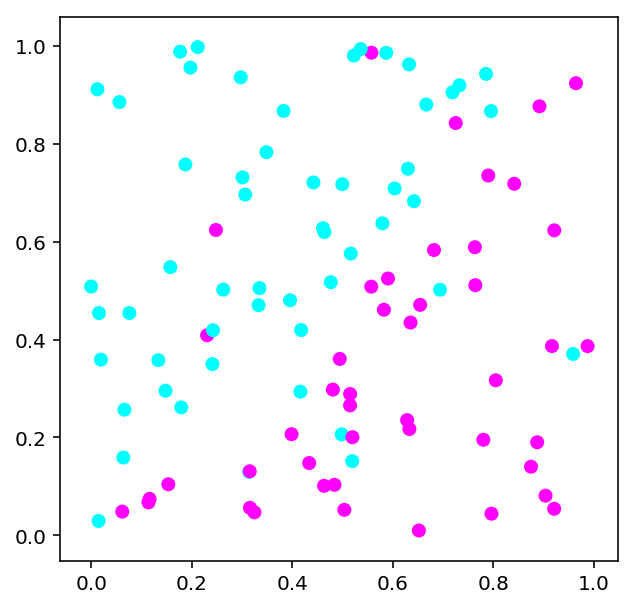

In [40]:
c = 1
X = np.random.random((100, 2))
Y = np.sign(X[:, 0]-c*X[:, 1])

# Randomly flip the first x%
error = 0.1
for i in range(int(len(X) * error)):
    Y[i] = Y[i] * -1

# Create colormap and plot
colors = cm.get_cmap('cool', 2)
plt.scatter(X[:,0],X[:,1], c= colors(Y))
plt.show()

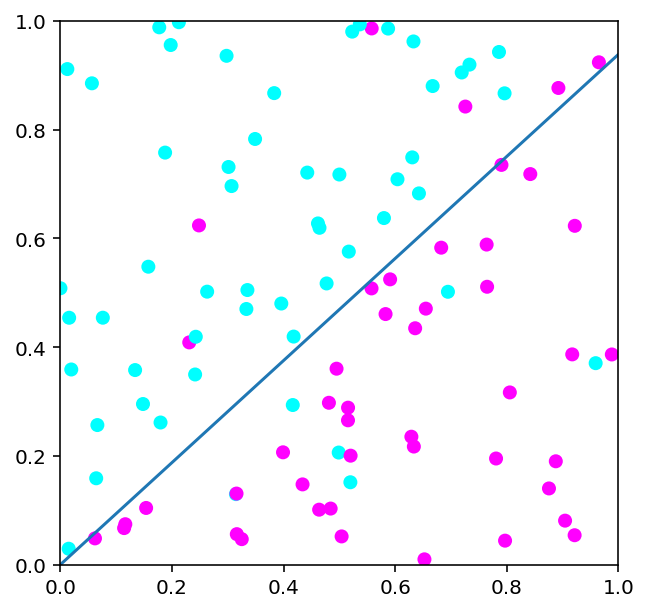

0.88

In [43]:
class Perceptron:
    
    def __init__(self, iterations):
        self.w = np.zeros((2,1))
        self.iterations = iterations
    
    def train(self, X, Y):
        for i in range(self.iterations):
            for x_val,y_val in zip(X,Y):
                if (np.sign(np.dot(x_val, self.w)) != y_val):
                    self.w += (y_val*x_val).reshape(-1, 1)
                    break;
        
    def predict(self, X):
        return(np.sign(np.sign(np.dot(X, self.w))))
    
    def err(self, X, Y):
        return(np.count_nonzero(self.predict(X).reshape(-1)-Y)/len(Y))

p = Perceptron(100)
p.train(X, Y)

plt.scatter(X[:,0],X[:,1], c= colors(Y))

colors_2 = cm.get_cmap('binary', 20)

slope = -1 * p.w[1] / p.w[0]
plt.plot([0, 1],[0, slope])

plt.axis([0, 1, 0, 1])
plt.show()

p.err(X, Y)

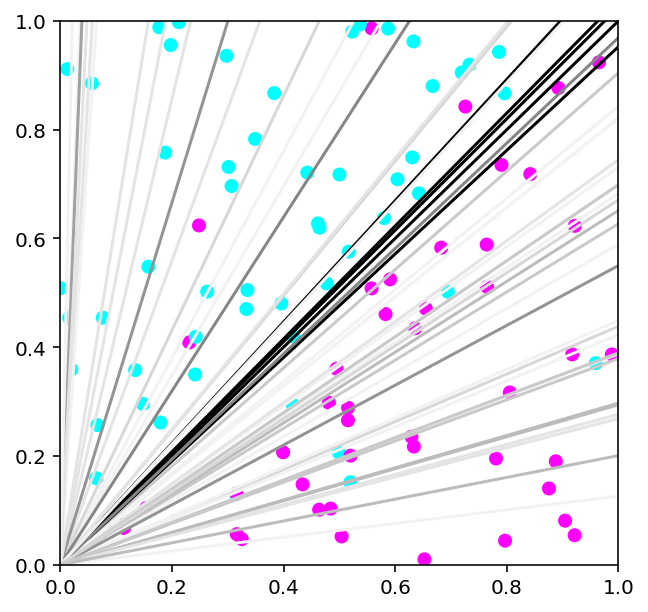

Error:  0.1


In [44]:
class VotedPerceptron:
    
    def __init__(self, t):
        self.w = np.zeros((2,1))
        self.w_list = []
        self.t = t
    
    def train(self, X, Y):
        duration = 0
        for i in range(self.t):
            for x,y in zip(X,Y):
                if np.sign(np.dot(x, self.w)) != y:
                    # Check if duration > 0
                    if duration > 0:
                        curr_w = self.w.copy()
                        self.w_list.append((duration, curr_w))
                    duration = 0
                    self.w += (y*x).reshape(-1, 1)
                else:
                    duration += 1
    
    def predict(self, X):
        total = np.zeros((X.shape[0], 1))
        for duration,w in self.w_list:
            total += duration*np.sign(np.dot(X, w))
        return(np.sign(total))
    
    def err(self, X, Y):
        return(np.count_nonzero(self.predict(X).reshape(-1)-Y)/len(Y))

vp = VotedPerceptron(5)
vp.train(X,Y)

plt.scatter(X[:,0],X[:,1], c= colors(Y))

colors_2 = cm.get_cmap('binary', 20)

for w in vp.w_list:
    slope = -1 * w[1][1] / w[1][0]
    plt.plot([0, 1],[0, slope], c = colors_2(w[0]))

plt.axis([0, 1, 0, 1])
plt.show()

print('Error: ', vp.err(X, Y))

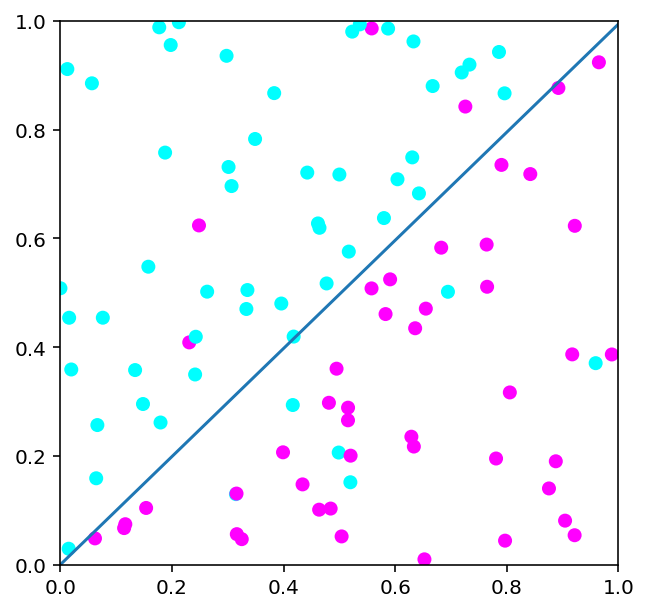

Error:  0.11


In [46]:
class WPerceptron:

    def __init__(self, m):
        self.w = None
        self.m = m
    
    def train(self, X, Y):
        #self.w = np.sum(X, axis=0)/len(X)
        self.w = math.sqrt(2)*np.sum(X, axis=0)/np.linalg.norm(np.sum(X, axis=0)) # hopfield vector
        
        for i in range(self.m):
            sigma = None
            min_product = float('inf')
            for x_val,y_val in zip(X,Y):
                product = np.dot((x_val*y_val), self.w)
                if product < min_product:
                    sigma = x_val*y_val
                    min_product = product
            # Note, I'm hard-coding 2 here for now and below
            val = ((2 - min_product)/(np.linalg.norm(self.w)**2 - min_product))
            r = sigma + val * math.sqrt(2)*self.w/math.sqrt(np.linalg.norm(self.w))
            self.w += (1/2)*r
            
    def predict(self, X):
        return(np.sign(np.sign(np.dot(X, self.w))))
    
    def err(self, X, Y):
        return(np.count_nonzero(self.predict(X).reshape(-1)-Y)/len(Y))

wp1 = WPerceptron(40)
wp1.train(X, Y)

plt.scatter(X[:,0],X[:,1], c= colors(Y))

colors_2 = cm.get_cmap('binary', 20)

slope = -1 * wp1.w[1] / wp1.w[0]
plt.plot([0, 1],[0, slope])

plt.axis([0, 1, 0, 1])
plt.show()

print('Error: ', wp1.err(X, Y))